# Porta dos desesperados
### _Exercício avaliativo - ME323_
<p align="right" style="text-align:right;">Júlio Moreira Blás de Barros RA: 200491</p>
<p align="right" style="text-align:right;">José Carlos Cieni Júnior RA: 170859</p>
<p align="right" style="text-align:right;">Gabriel Akahoshi Collado RA: 197141</p>

<p>Vamos primeiro definir nossas variáveis de teste</p>

In [92]:
import random
portas_possiveis = {1, 2, 3}
# para cada escolha inicial, teremos uma porta correta
escolhas_iniciais = [random.choice(list(portas_possiveis)) for x in range(0, 10000)]
portas_corretas = [random.choice(list(portas_possiveis)) for x in range(0, 10000)]

Vejamos a porcentagem de acerto mantendo a porta após mostrar a porta correta (nesse caso, a porcentagem de acerto se mantém a da primeira escolha

In [93]:
total = 10000
acertos = 0
for i in range(0, 10000):
    if (escolhas_iniciais[i] == portas_corretas[i]):
        acertos += 1
print(acertos/total)

0.333


No caso da troca de porta, temos que tirar uma porta errada que não é a inicial nem a correta, e depois selecionar a outra, então, temos:

In [94]:
total = 10000
acertos = 0
for i in range(0, 10000):
    porta_mostrada = random.choice(
        list(portas_possiveis.difference({escolhas_iniciais[i], portas_corretas[i]}))
    )
    porta_escolhida = list(portas_possiveis.difference({porta_mostrada, escolhas_iniciais[i]}))[0]
    if (porta_escolhida == portas_corretas[i]):
        acertos += 1
    
print(acertos/total)

0.667


### Gráficos
Para as próximas células, é necessária a instalação do matplotlib

Podemos plotar gráficos para esse tipo de iteração de mantimento:

In [95]:
total = 1000
acertos = 0
x_tentativas = []
y_acerto = []
for i in range(1, total):
    if (escolhas_iniciais[i] == portas_corretas[i]):
        acertos += 1
    x_tentativas.append(i)
    y_acerto.append(acertos/i)

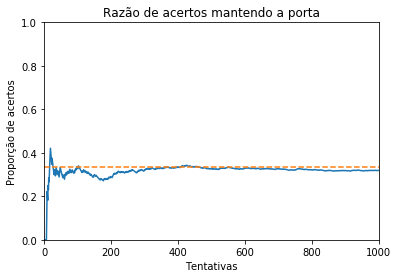

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('Tentativas')
plt.ylabel('Proporção de acertos')
plt.title('Razão de acertos mantendo a porta')
plt.xlim(0, total) 
plt.ylim(0, 1)
linha_de_tendencia_x = range(1, total)
linha_de_tendencia_y = [1/3 for i in range(1, total)]
plt.plot(x_tentativas, y_acerto)
plt.plot(linha_de_tendencia_x, linha_de_tendencia_y, '--')

E gráficos para a troca:

In [97]:
total = 1000
acertos = 0
x_tentativas = []
y_acerto = []
for i in range(1, total):
    porta_mostrada = random.choice(
        list(portas_possiveis.difference({escolhas_iniciais[i], portas_corretas[i]}))
    )
    porta_escolhida = list(portas_possiveis.difference({porta_mostrada, escolhas_iniciais[i]}))[0]
    if (porta_escolhida == portas_corretas[i]):
        acertos += 1
    x_tentativas.append(i)
    y_acerto.append(acertos/i)

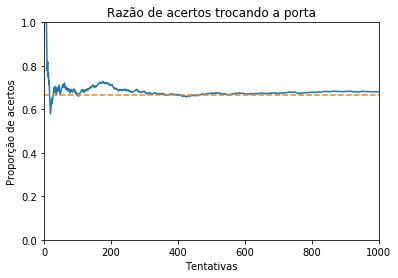

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('Tentativas')
plt.ylabel('Proporção de acertos')
plt.title('Razão de acertos trocando a porta')
linha_de_tendencia_x = range(1, total)
linha_de_tendencia_y = [2/3 for i in range(1, total)]
plt.xlim(0, total) 
plt.ylim(0, 1)
plt.plot(x_tentativas, y_acerto)
plt.plot(linha_de_tendencia_x, linha_de_tendencia_y, '--')

Podemos definir uma função para cada uma e permutar o total de tentativas, mas pelos resultados das células anteriores já é evidente que uma nada mais é do que o complemento da outra

In [99]:
import random

portas_possiveis = {1, 2, 3}
def acertos_mantendo(iteracoes):
    # para cada escolha inicial, teremos uma porta correta
    escolhas_iniciais = [random.choice(list(portas_possiveis)) for x in range(0, iteracoes)]
    portas_corretas = [random.choice(list(portas_possiveis)) for x in range(0, iteracoes)]
    acertos = 0
    for i in range(0, iteracoes):
        if (escolhas_iniciais[i] == portas_corretas[i]):
            acertos += 1
    return "Proporção de acertos:" + str(acertos/iteracoes)

def acertos_trocando(iteracoes):
    # para cada escolha inicial, teremos uma porta correta
    escolhas_iniciais = [random.choice(list(portas_possiveis)) for x in range(0, iteracoes)]
    portas_corretas = [random.choice(list(portas_possiveis)) for x in range(0, iteracoes)]
    acertos = 0
    for i in range(0, iteracoes):
        porta_mostrada = random.choice(
            list(portas_possiveis.difference({escolhas_iniciais[i], portas_corretas[i]}))
        )
        porta_escolhida = list(portas_possiveis.difference({porta_mostrada, escolhas_iniciais[i]}))[0]
        if (porta_escolhida == portas_corretas[i]):
            acertos += 1
    return "Proporção de acertos:" + str(acertos/iteracoes)

Para o próximo exemplo é necessaria a instalação de ipywidgets no servidor, segundo [este link](https://ipywidgets.readthedocs.io/en/stable/user_install.html)

In [100]:
import ipywidgets as widgets
from ipywidgets import Layout
from IPython.display import display
style = {'description_width': 'initial'}

In [101]:
iSliderTroca = widgets.BoundedIntText(
    min=1,
    max=999999,
    value=5,
    description='Iteracoes trocando',
    layout=Layout(width='60%'),
    style=style
)
iSliderMantem = widgets.BoundedIntText(
    min=1,
    max=999999,
    value=5,
    description='Iteracoes mantendo',
    layout=Layout(width='60%'),
    style=style
)

In [102]:
widgets.interact(acertos_mantendo, iteracoes=iSliderMantem);
widgets.interact(acertos_trocando, iteracoes=iSliderTroca);

interactive(children=(BoundedIntText(value=5, description='Iteracoes mantendo', layout=Layout(width='60%'), ma…

interactive(children=(BoundedIntText(value=5, description='Iteracoes trocando', layout=Layout(width='60%'), ma…